In [1]:
import sys
import os

# Agregar src/ al path
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.load_data import load_data, validate_columns
from data.clean_data import clean_data

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
df_raw = load_data()

expected_columns = [
    "work_year", "experience_level", "employment_type", "job_title",
    "salary", "salary_currency", "salary_in_usd", "employee_residence",
    "remote_ratio", "company_location", "company_size"
]
validate_columns(df_raw, expected_columns)

print(f"Shape original: {df_raw.shape}")
df_raw.head()

Shape original: (607, 12)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df_clean = clean_data(df_raw)

print(f"Shape limpio: {df_clean.shape}")
df_clean.head()

Shape limpio: (600, 61)


,Unnamed: 0,work_year,salary,salary_currency,salary_usd,employee_residence,remote_ratio,company_location,experience_level_encoded,company_size_encoded,...,job_title_Machine Learning Manager,job_title_Machine Learning Scientist,job_title_Marketing Data Analyst,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist
0,0,2020,70000,EUR,79833,DE,0,DE,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2020,260000,USD,260000,JP,0,JP,2.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,2,2020,85000,GBP,109024,GB,50,GB,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2020,20000,USD,20000,HN,0,HN,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,4,2020,150000,USD,150000,US,50,US,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0


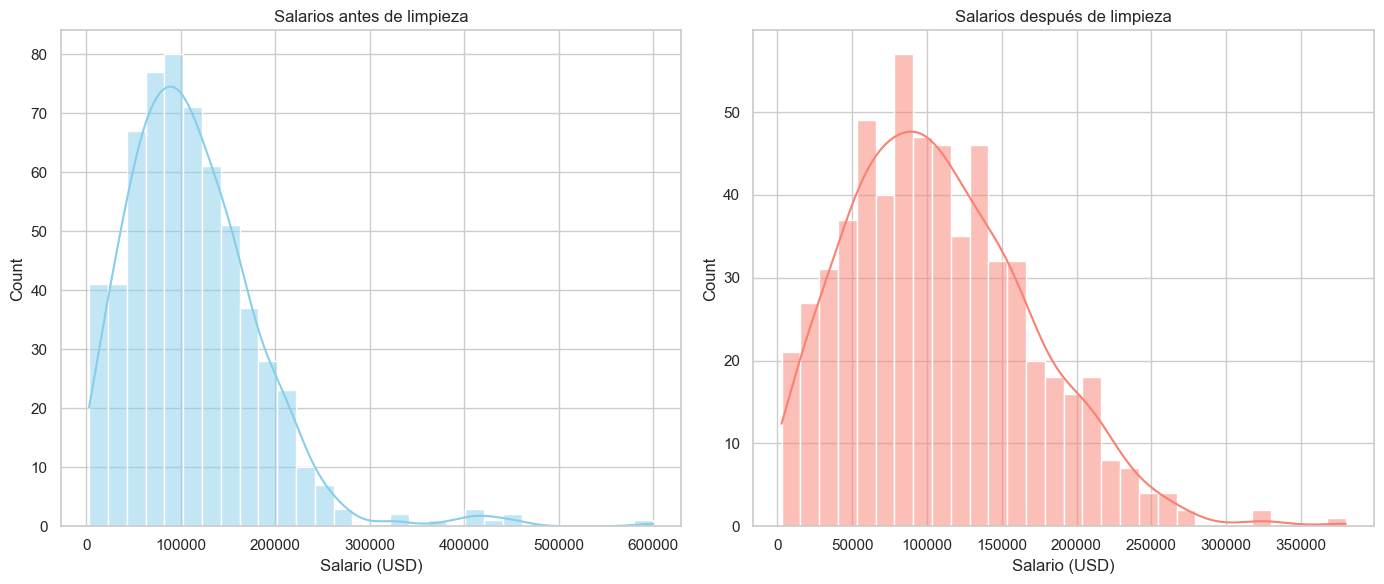

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_raw["salary_in_usd"], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Salarios antes de limpieza")
axes[0].set_xlabel("Salario (USD)")

sns.histplot(df_clean["salary_usd"], bins=30, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Salarios después de limpieza")
axes[1].set_xlabel("Salario (USD)")

plt.tight_layout()
plt.show()

In [6]:
encoded_cols = ["experience_level_encoded", "company_size_encoded"]
print("Distribución de codificaciones ordinales:")
for col in encoded_cols:
    print(f"\n{col}:")
    print(df_clean[col].value_counts())

Distribución de codificaciones ordinales:

experience_level_encoded:
experience_level_encoded
2.0    278
1.0    210
0.0     88
3.0     24
Name: count, dtype: int64

company_size_encoded:
company_size_encoded
1.0    325
2.0    193
0.0     82
Name: count, dtype: int64


In [7]:
output_path = os.path.abspath(os.path.join(os.getcwd(), "..", "data", "processed", "salaries_clean.csv"))
df_clean.to_csv(output_path, index=False)
print(f"✅ Dataset limpio guardado en: {output_path}")

✅ Dataset limpio guardado en: c:\Users\sarmi\Repositorio_git\Salary\data-scientist-salary-pipeline\data\processed\salaries_clean.csv
